# 1. Import Dataset

In [1]:
# import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load data
url = 'https://raw.githubusercontent.com/Yogaaprila/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/main/marketing_campaign_data.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',None)

df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# 2. Feature Extractions

## 2.1 Create New Columns

In [7]:
from datetime import datetime

# convert dt_customer to datetime data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create Duration Membership column
df['Membership_Duration'] = 2024 - df['Dt_Customer'].dt.year

# create total transaction column
df['Total_Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] +df['NumCatalogPurchases'] + df['NumStorePurchases']

# create Campaign_Acceptance_Total column
df['Campaign_Acceptance_Total'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# create convertion rate columns
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df['Conversion_Rate'] = round(df.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

# create age column
df['Age'] = 2024 - df['Year_Birth']

# Clustering Age Column
def age_group(age):
    if age < 18:
        return 'Anak-anak'
    elif 18 <= age < 30:
        return 'Remaja'
    elif 30 <= age < 60:
        return 'Dewasa'
    else:
        return 'Lansia'

# create age group column
df['Age_Group'] = df['Age'].apply(age_group)

# create total kid column
df['Total_Kid'] = df['Kidhome'] + df['Teenhome']

# Create Is Parent Column
df['Is_Parent'] = (df['Total_Kid'] > 0).astype(int)

# create total spending column
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [9]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Duration,Total_Transaction,Campaign_Acceptance_Total,Conversion_Rate,Age,Age_Group,Total_Kid,Is_Parent,Total_Spending
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,25,0,3.57,67,Lansia,0,0,1617000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,6,0,1.20,70,Lansia,2,1,27000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,21,0,5.25,59,Dewasa,0,0,776000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10,8,0,1.33,40,Dewasa,1,1,53000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,10,19,0,3.80,43,Dewasa,1,1,422000


# 3. EDA (Exploratory Data Analysis)

## 3.1 Infomation About Data

In [11]:
# print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 2240 non-null   int64         
 1   ID                         2240 non-null   int64         
 2   Year_Birth                 2240 non-null   int64         
 3   Education                  2240 non-null   object        
 4   Marital_Status             2240 non-null   object        
 5   Income                     2216 non-null   float64       
 6   Kidhome                    2240 non-null   int64         
 7   Teenhome                   2240 non-null   int64         
 8   Dt_Customer                2240 non-null   datetime64[ns]
 9   Recency                    2240 non-null   int64         
 10  MntCoke                    2240 non-null   int64         
 11  MntFruits                  2240 non-null   int64         
 12  MntMea

## 3.2 Descriptive Statistics

In [13]:
# separate numerical and categorical columns
numericals = ['ID','Year_Birth','Income', 'Kidhome', 'Teenhome','Recency', 'MntCoke',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue',
             'Conversion_Rate', 'Age', 'Total_Kid', 'Total_Spending','Total_Transaction','Campaign_Acceptance_Total','Membership_Duration']

categoricals= ['Education','Marital_Status','Age_Group'] 

categoricals2 = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain','Response','Is_Parent']

date = ['Dt_Customer']

In [15]:
df[numericals].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Conversion_Rate,Age,Total_Kid,Total_Spending,Total_Transaction,Campaign_Acceptance_Total,Membership_Duration
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,4.395170,55.194196,0.950446,6.057982e+05,14.862054,0.297768,10.971875
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,4.913677,11.984069,0.751803,6.022493e+05,7.677173,0.678381,0.684554
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,0.000000,5.000000e+03,0.000000,0.000000,10.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,1.220000,47.000000,0.000000,6.875000e+04,8.000000,0.000000,11.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,2.600000,54.000000,1.000000,3.960000e+05,15.000000,0.000000,11.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,5.347500,65.000000,1.000000,1.045500e+06,21.000000,0.000000,11.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,43.000000,131.000000,3.000000,2.525000e+06,44.000000,4.000000,12.000000


In [17]:
df[categoricals].describe()

,Education,Marital_Status,Age_Group
count,2240,2240,2240
unique,5,6,3
top,S1,Menikah,Dewasa
freq,1127,864,1447


In [19]:
df[categoricals2].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.715179
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df[date].describe().T

,count,mean,min,25%,50%,75%,max
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00


## 3.3 Univariate and Bivariate Analysis

### 3.3.1 Scatter Plot of Conversion Rate vs Age, Income, Total Spending, Total Kid, Is Parent and Campaign Acceptance Total

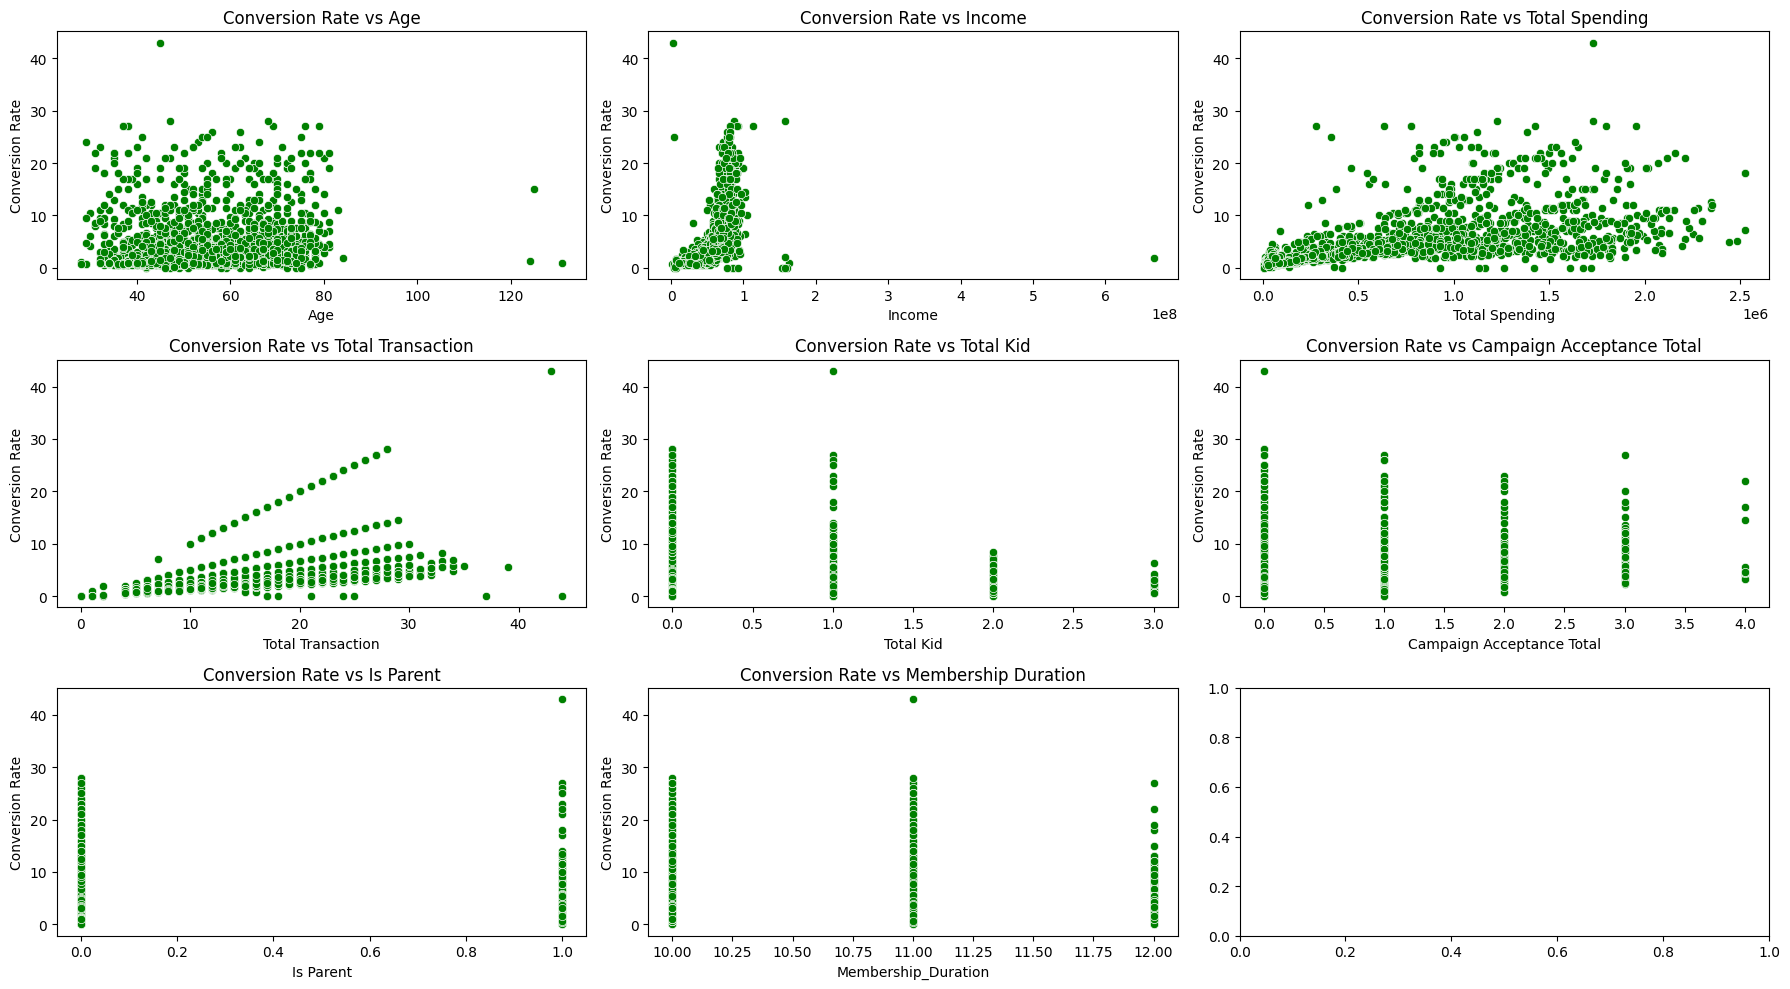

In [23]:
# Define figure size and number of rows & columns for subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  

# Prepare data for plotting in each subplot, including is_parent
plot_data = [
    ('Age', 'Conversion Rate vs Age', 'Age'),
    ('Income', 'Conversion Rate vs Income', 'Income'),
    ('Total_Spending', 'Conversion Rate vs Total Spending', 'Total Spending'),
    ('Total_Transaction','Conversion Rate vs Total Transaction','Total Transaction'),
    ('Total_Kid', 'Conversion Rate vs Total Kid', 'Total Kid'),
    ('Campaign_Acceptance_Total', 'Conversion Rate vs Campaign Acceptance Total', 'Campaign Acceptance Total'),
    ('Is_Parent', 'Conversion Rate vs Is Parent', 'Is Parent'),
    ('Membership_Duration', 'Conversion Rate vs Membership Duration', 'Membership_Duration')
]

# Create scatter plot in each subplot
for i, (x, title, xlabel) in enumerate(plot_data):
    row, col = divmod(i, 3)  # Get subplot position
    sns.scatterplot(x=x, y='Conversion_Rate', data=df, ax=axes[row, col],color='green')
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel(xlabel)
    axes[row, col].set_ylabel('Conversion Rate')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the scatterplot results:  
1. The distribution of `age`, `total spending`, `total campaign acceptance`, `is parent`, and `membership duration` appears to have little to no strong correlation with the `conversion rate`.  
2. The distribution of `income` against `conversion rate` shows that higher income tends to lead to a higher conversion rate, although the correlation does not seem very strong.  
3. Higher conversion rates are predominantly found among customers with 1 child or no children.

### 3.3.2 Distribution of Conversion Rate and Age Group, Education, and Marital Status

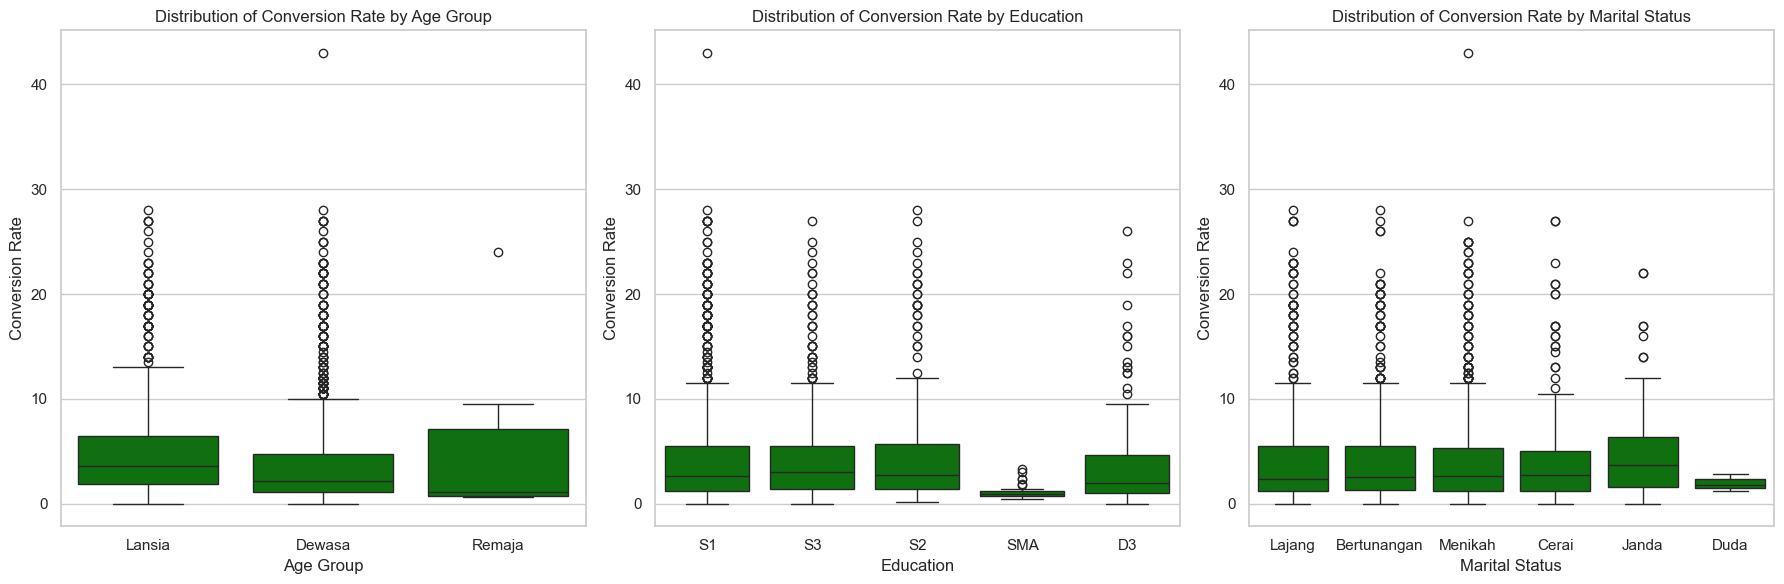

In [28]:
# Set style
sns.set(style="whitegrid")

# Define figure size and number of rows & columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Data for each subplot
plot_data = [
    ('Age_Group', 'Distribution of Conversion Rate by Age Group', 'Age Group'),
    ('Education', 'Distribution of Conversion Rate by Education', 'Education'),
    ('Marital_Status', 'Distribution of Conversion Rate by Marital Status', 'Marital Status')
]

# Create box plot in each subplot
for i, (x, title, xlabel) in enumerate(plot_data):
    sns.boxplot(x=x, y='Conversion_Rate', data=df, ax=axes[i], color='green')
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Conversion Rate')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the chart, the following conclusions were drawn:
1. The distribution of the conversion rate across the `age group` column does not seem to differ significantly among the groups (lansia, dewasa, and remaja).  
2. The distribution of the conversion rate for `education` appears similar across all groups, although it is slightly lower for SMA.  
3. The distribution of the conversion rate for `marital status` also seems consistent across all groups, but it is notably lower for Duda.

### 3.3.3 Boxplot

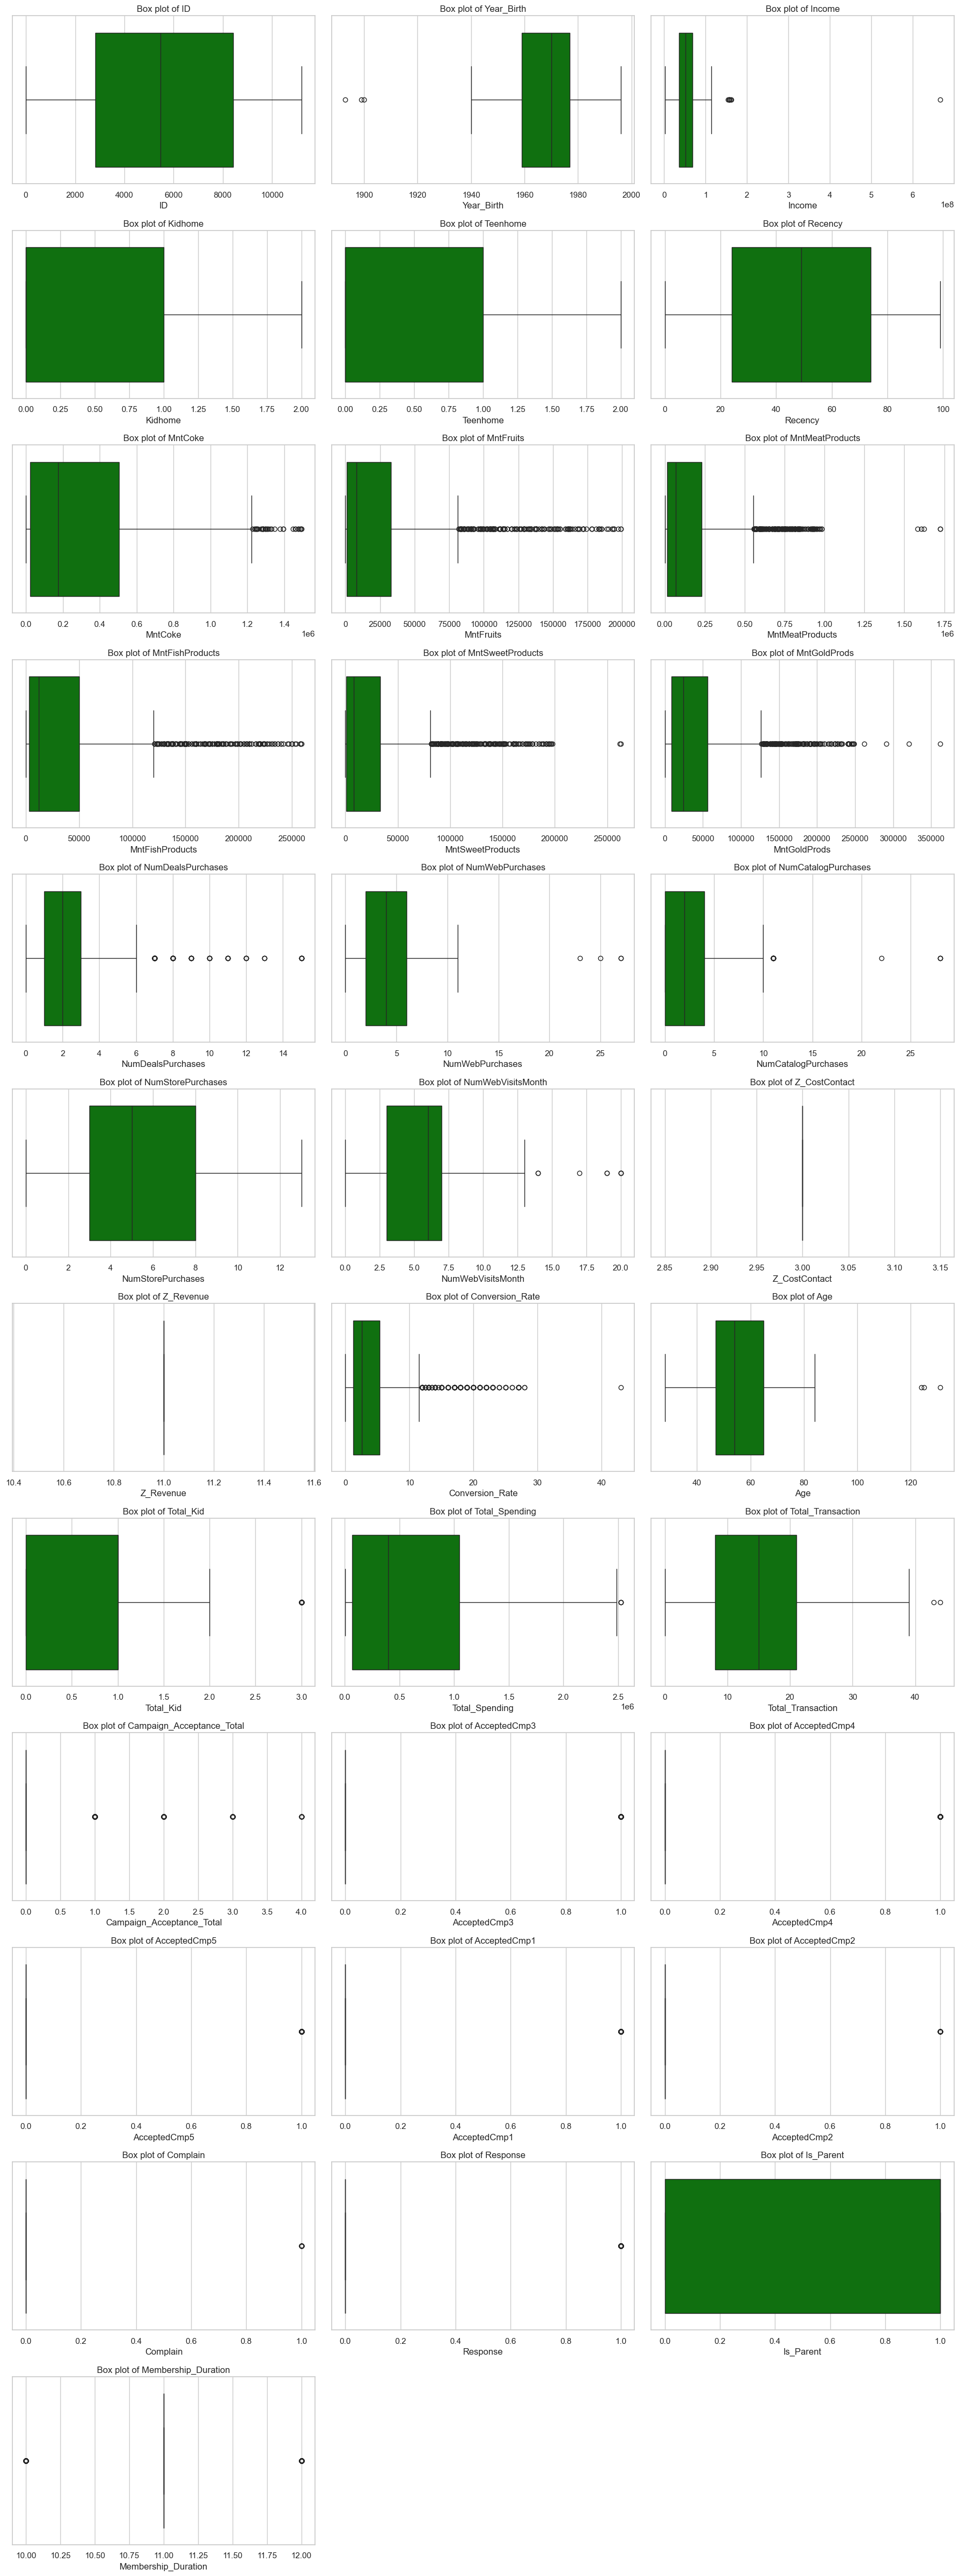

In [30]:
# selected feature
numerical = ['ID','Year_Birth','Income', 'Kidhome', 'Teenhome','Recency', 'MntCoke',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue',
             'Conversion_Rate', 'Age', 'Total_Kid', 'Total_Spending','Total_Transaction','Campaign_Acceptance_Total',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Complain','Response','Is_Parent','Membership_Duration']

# Set up the plotting style
sns.set(style="whitegrid")

# Determine the number of rows needed for the plots
n_cols = 3  # Number of columns per row
n_rows = (len(numerical) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical):
    sns.boxplot(x=df[feature], color='green', ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Almost all columns contain outliers. To address this, the capping method will be applied.

### 3.3.4 Distribution Chart

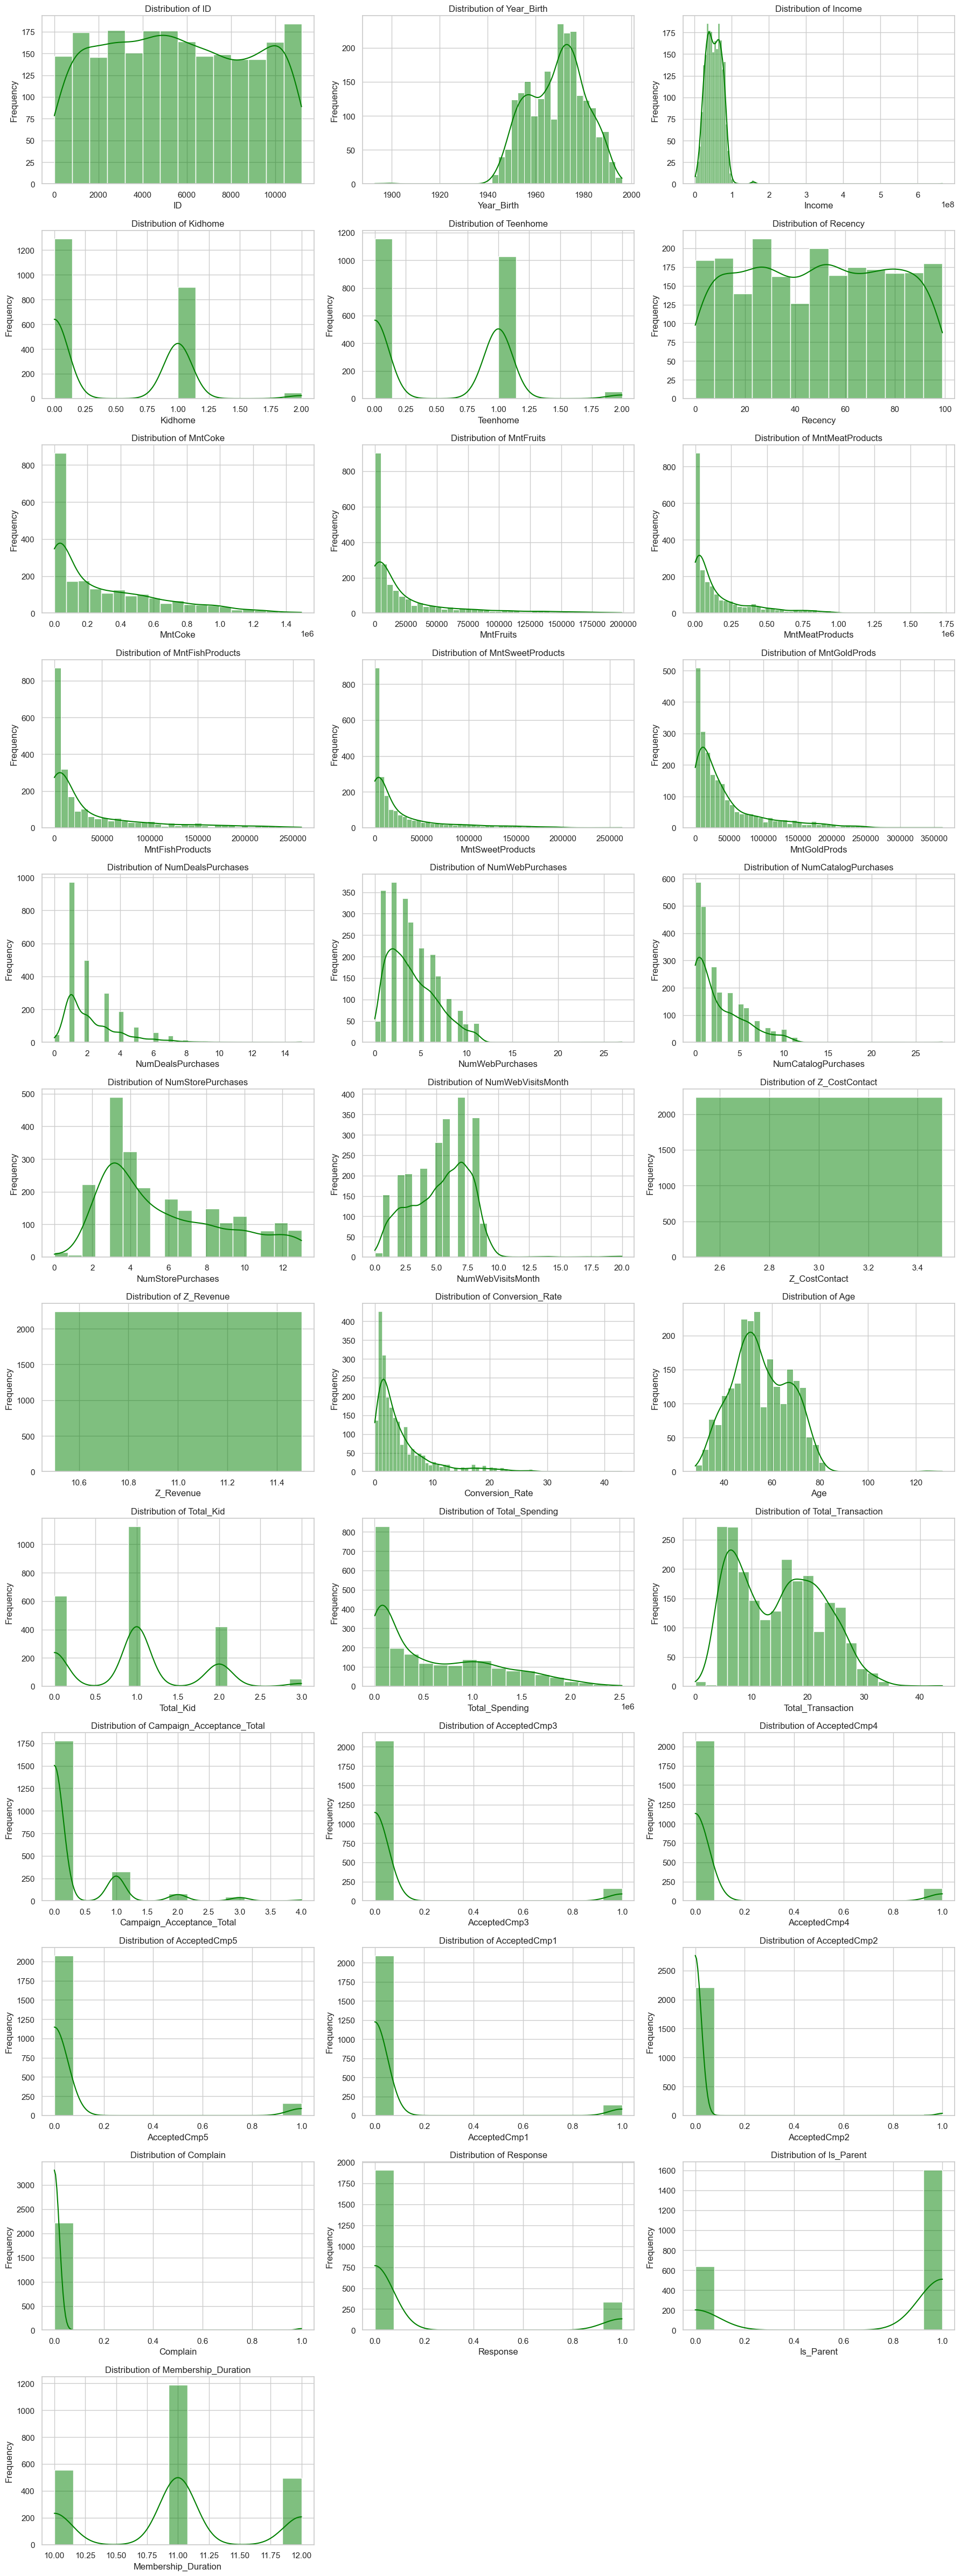

In [32]:
# selected feature
numerical = ['ID','Year_Birth','Income', 'Kidhome', 'Teenhome','Recency', 'MntCoke',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Z_CostContact', 'Z_Revenue',
             'Conversion_Rate', 'Age', 'Total_Kid', 'Total_Spending','Total_Transaction','Campaign_Acceptance_Total',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Complain','Response','Is_Parent','Membership_Duration']

# Set up the plotting style
sns.set(style="whitegrid")

# Plot numerical features
n_cols = 3  # Number of columns per row
n_rows = (len(numerical) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

for i, feature in enumerate(numerical):
    sns.histplot(df[feature], kde=True, color='green', ax=axes[i])  # Set color to green
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The data distribution is predominantly skewed.

### 3.3.5 Bar Chart or Count Plot

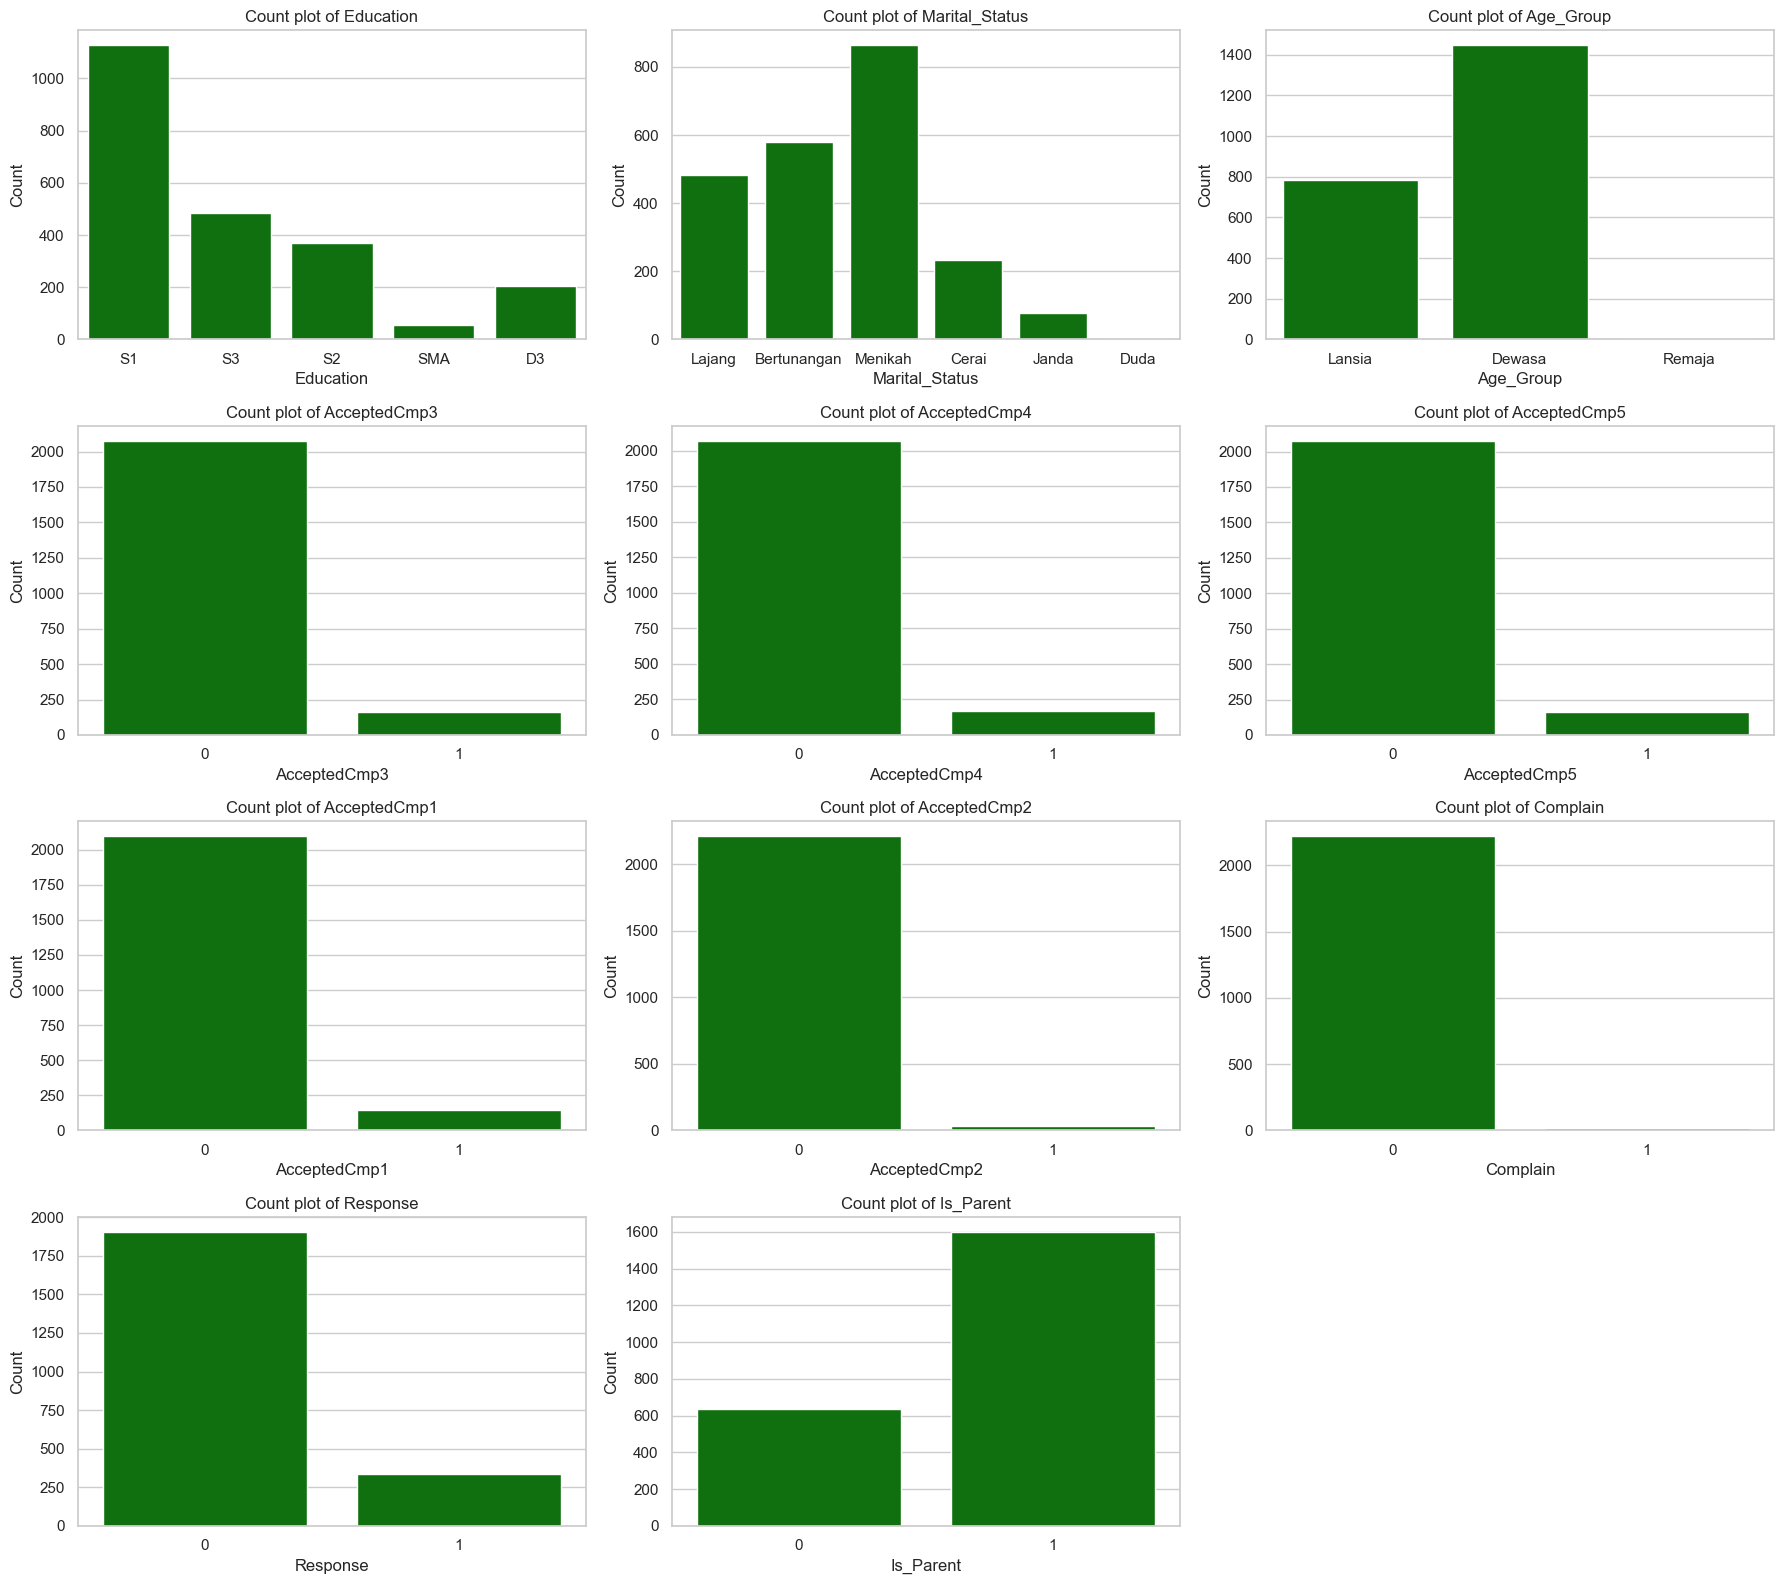

In [34]:
categorical3 = ['Education','Marital_Status','Age_Group','AcceptedCmp3',
                'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain','Response','Is_Parent']

# Plot categorical features
n_rows = (len(categorical3) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

for i, feature in enumerate(categorical3):
    sns.countplot(x=df[feature], color='green', ax=axes[i])  # Set color to green
    axes[i].set_title(f'Count plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:  
1. Customers are predominantly 'SMA','sudah menikah','Dewasa', and 'Orang Tua' (already have children).  
2. Many customers have not yet engaged with the campaigns provided.

## 3.4 Multivariate Analysis

### 3.4.1 Heatmap Correlation

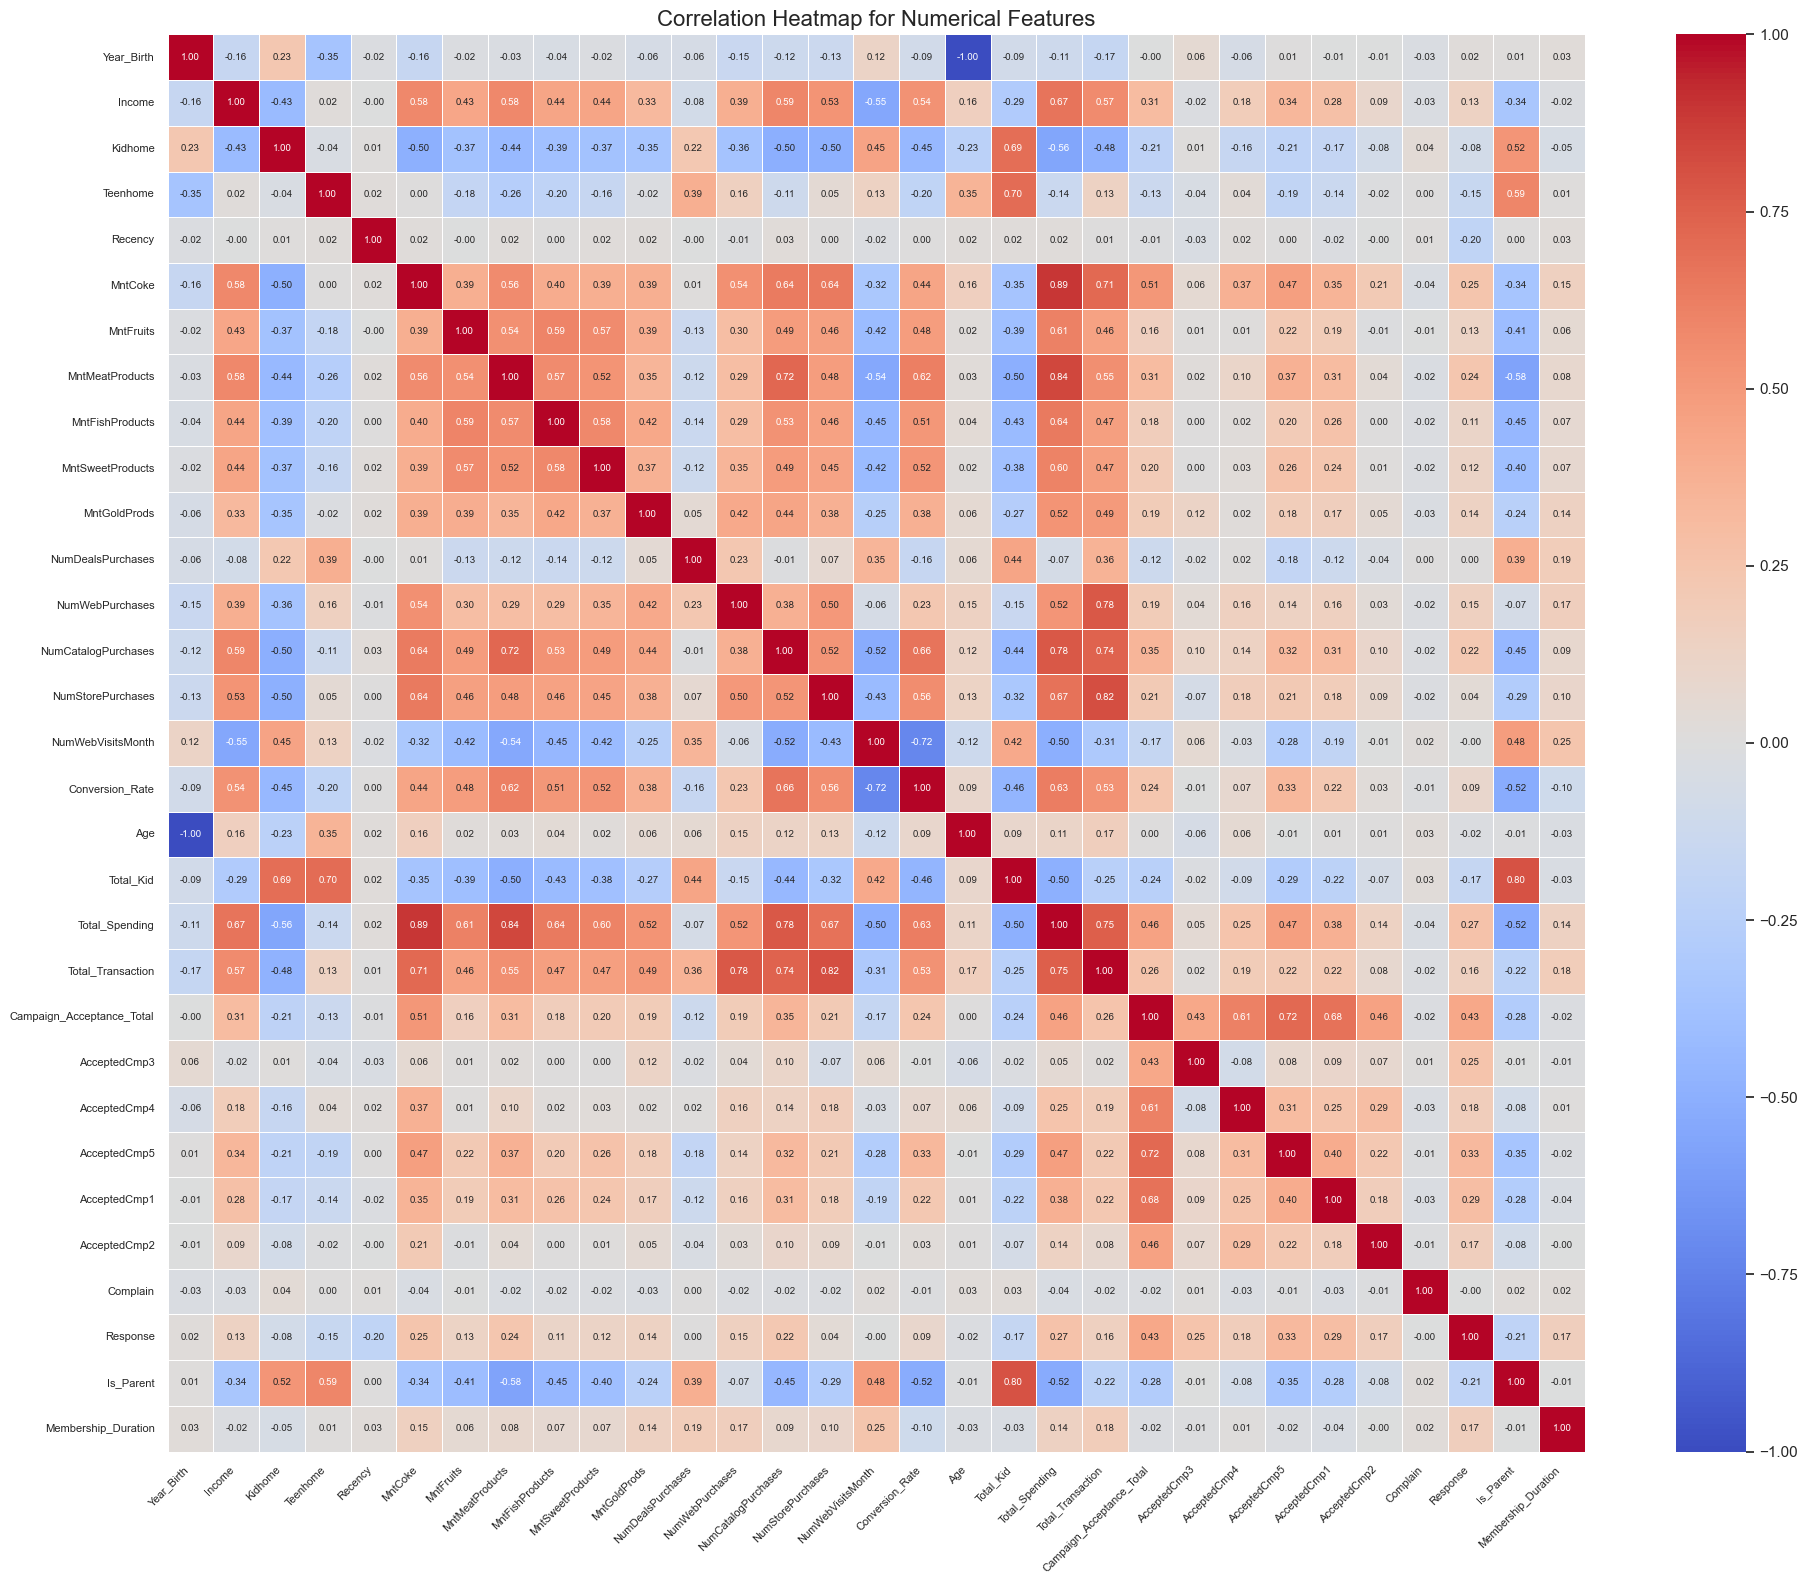

In [61]:
selected_feature = ['Year_Birth','Income', 'Kidhome', 'Teenhome','Recency', 'MntCoke',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
             'NumStorePurchases', 'NumWebVisitsMonth','Conversion_Rate', 'Age', 
             'Total_Kid', 'Total_Spending','Total_Transaction','Campaign_Acceptance_Total',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Complain','Response','Is_Parent','Membership_Duration']

# Subset data with only the numerical columns
df_numerical = df[selected_feature]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Set up the figure size
plt.figure(figsize=(20, 16))

# Create the heatmap with smaller font for annotations
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f",  
    cmap='coolwarm',
    square=True, 
    linewidths=0.5, 
    annot_kws={"size": 7}  # Adjust annotation font size
)

# Rotate x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)

# Add a title
plt.title("Correlation Heatmap for Numerical Features", fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [63]:
# Subset data with only the numerical columns
df_numerical = df[selected_feature]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Filter correlations above +0.7 or below -0.7
high_correlation = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Extract the pairs of features with high correlations
high_corr_pairs = []
for col in high_correlation.columns:
    for idx in high_correlation.index:
        if idx != col and not pd.isna(high_correlation.loc[idx, col]):
            high_corr_pairs.append((idx, col, high_correlation.loc[idx, col]))

# Convert to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Drop duplicate pairs (A->B and B->A are the same)
high_corr_df = high_corr_df.drop_duplicates(subset=["Feature 1", "Feature 2"]) 

# Display the highly correlated feature pairs
print("Highly Correlated Features (Correlation > 0.7 or < -0.7):")
print(high_corr_df)

Highly Correlated Features (Correlation > 0.7 or < -0.7):
                    Feature 1                  Feature 2  Correlation
0                         Age                 Year_Birth    -1.000000
1              Total_Spending                    MntCoke     0.891839
2           Total_Transaction                    MntCoke     0.712789
3         NumCatalogPurchases            MntMeatProducts     0.723827
4              Total_Spending            MntMeatProducts     0.842965
5           Total_Transaction            NumWebPurchases     0.777831
6             MntMeatProducts        NumCatalogPurchases     0.723827
7              Total_Spending        NumCatalogPurchases     0.778577
8           Total_Transaction        NumCatalogPurchases     0.735198
9           Total_Transaction          NumStorePurchases     0.820259
10            Conversion_Rate          NumWebVisitsMonth    -0.721269
11          NumWebVisitsMonth            Conversion_Rate    -0.721269
12                 Year_Birth   

Based on the heatmap results:  
 There are many features thathave high  linear correlations, both positive and negative. Therefore, some features can be removed during modeling to reduce multicollinearity.

# 4. Data Preprocessing

In [67]:
df_model = df.copy()

In [69]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 2240 non-null   int64         
 1   ID                         2240 non-null   int64         
 2   Year_Birth                 2240 non-null   int64         
 3   Education                  2240 non-null   object        
 4   Marital_Status             2240 non-null   object        
 5   Income                     2216 non-null   float64       
 6   Kidhome                    2240 non-null   int64         
 7   Teenhome                   2240 non-null   int64         
 8   Dt_Customer                2240 non-null   datetime64[ns]
 9   Recency                    2240 non-null   int64         
 10  MntCoke                    2240 non-null   int64         
 11  MntFruits                  2240 non-null   int64         
 12  MntMea

## 4.1 Feature Encoding

In [71]:
# List of columns to count unique values
columns_to_count = ['Education', 'Marital_Status', 'Age_Group']

# Counting and displaying unique values for each column
for column in columns_to_count:
    print(f"Unique values for column '{column}':")
    print(df_model[column].value_counts())
    print()  # Adding an empty line for separation

Unique values for column 'Education':
Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

Unique values for column 'Marital_Status':
Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

Unique values for column 'Age_Group':
Age_Group
Dewasa    1447
Lansia     786
Remaja       7
Name: count, dtype: int64



In [73]:
# Replace Cerai and Duda to Cerai
df_model['Marital_Status'] = df_model['Marital_Status'].replace({'Janda': 'Cerai', 'Duda': 'Cerai'})

In [75]:
# Mapping for Education column
education_mapping = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 2,
    'S3': 3
}

# Mapping for Age_Group column
age_group_mapping = {
    'Remaja': 0,
    'Dewasa': 1,
    'Lansia': 2
}

# Performing mapping
df_model['Education'] = df_model['Education'].map(education_mapping)
df_model['Age_Group'] = df_model['Age_Group'].map(age_group_mapping)

# Performing one-hot encoding for Marital_Status column
df_model = pd.get_dummies(df_model, columns=['Marital_Status'], prefix='Marital_Status', prefix_sep='_')

# Identifying columns resulting from one-hot encoding with boolean data type
bool_columns = df_model.select_dtypes(include='bool').columns

# Changing data type from boolean to integer
df_model[bool_columns] = df_model[bool_columns].astype(int)

In [77]:
df_model.head()

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Duration,Total_Transaction,Campaign_Acceptance_Total,Conversion_Rate,Age,Age_Group,Total_Kid,Is_Parent,Total_Spending,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,0,5524,1957,2,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12,25,0,3.57,67,2,0,0,1617000,0,0,1,0
1,1,2174,1954,2,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10,6,0,1.20,70,2,2,1,27000,0,0,1,0
2,2,4141,1965,2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11,21,0,5.25,59,1,0,0,776000,1,0,0,0
3,3,6182,1984,2,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10,8,0,1.33,40,1,1,1,53000,1,0,0,0
4,4,5324,1981,3,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,10,19,0,3.80,43,1,1,1,422000,0,0,0,1


## 4.2 Handle Missing Data

In [79]:
df_model.isnull().sum()

Unnamed: 0                     0
ID                             0
Year_Birth                     0
Education                      0
Income                        24
Kidhome                        0
Teenhome                       0
Dt_Customer                    0
Recency                        0
MntCoke                        0
MntFruits                      0
MntMeatProducts                0
MntFishProducts                0
MntSweetProducts               0
MntGoldProds                   0
NumDealsPurchases              0
NumWebPurchases                0
NumCatalogPurchases            0
NumStorePurchases              0
NumWebVisitsMonth              0
AcceptedCmp3                   0
AcceptedCmp4                   0
AcceptedCmp5                   0
AcceptedCmp1                   0
AcceptedCmp2                   0
Complain                       0
Z_CostContact                  0
Z_Revenue                      0
Response                       0
Membership_Duration            0
Total_Tran

In [81]:
# Count Percentage of Missing Values in Dataset
missing_values = df_model.isnull().any(axis=1).mean() * 100

print(f"Percentage of Missing Values: {missing_values:.2f}%")

Percentage of Missing Values: 1.07%


In [83]:
# imputing missing values with median 
df_model['Income'] = df_model['Income'].fillna(df_model['Income'].median())

In [85]:
# check missing values after drop it
print('Total of Missing Values:',df_model.isnull().sum().sum())

Total of Missing Values: 0


## 4.3 Handle Infinite Value

In [87]:
# check infinite value on data
infinite_value = df_model.isin([np.inf, -np.inf]).any().any()

if infinite_value == False:
    print('Data has not infinite values')
else:
    print('Data has infinite values')

Data has not infinite values


## 4.4 Handle Outlier

In [89]:
# Selected numerical columns
numerical_cols = df_model.select_dtypes(include=['float64', 'int64', 'int32']).columns


# Determine the lower and upper bounds for detecting outliers
Q1 = df_model[numerical_cols].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_model[numerical_cols].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range (IQR)

# Mark rows that are outliers (True for outliers)
outliers = ((df_model[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_model[numerical_cols] > (Q3 + 1.5 * IQR)))

# Check the number of outliers in each column
print(outliers.sum())

# Count the number of rows that have outliers in any column
outlier_rows = outliers.any(axis=1).sum()

# Calculate the percentage of outliers
outlier_percentage = (outlier_rows / len(df_model)) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Unnamed: 0                       0
ID                               0
Year_Birth                       3
Education                      743
Income                           8
Kidhome                          0
Teenhome                         0
Recency                          0
MntCoke                         35
MntFruits                      227
MntMeatProducts                175
MntFishProducts                223
MntSweetProducts               248
MntGoldProds                   207
NumDealsPurchases               86
NumWebPurchases                  4
NumCatalogPurchases             23
NumStorePurchases                0
NumWebVisitsMonth                8
AcceptedCmp3                   163
AcceptedCmp4                   167
AcceptedCmp5                   163
AcceptedCmp1                   144
AcceptedCmp2                    30
Complain                        21
Z_CostContact                    0
Z_Revenue                        0
Response                       334
Membership_Duration 

To handle outliers, the capping method will be applied.

In [92]:
# Function to apply capping
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.apply(lambda x: max(min(x, upper_bound), lower_bound))

# Applying capping to all columns in the DataFrame
df_capped = df_model.apply(cap_outliers)

In [96]:
df_capped.head()

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Duration,Total_Transaction,Campaign_Acceptance_Total,Conversion_Rate,Age,Age_Group,Total_Kid,Is_Parent,Total_Spending,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,0,5524,1957.0,2.0,58138000.0,0,0,2012-09-04,58,635000.0,81000.0,546000.0,120500.0,81000.0,88000.0,3.0,8.0,10.0,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,25.0,0.0,3.57,67.0,2,0.0,0,1617000.0,0,0.0,0.0,0
1,1,2174,1954.0,2.0,46344000.0,1,1,2014-03-08,38,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,6.0,0.0,1.20,70.0,2,2.0,1,27000.0,0,0.0,0.0,0
2,2,4141,1965.0,2.0,71613000.0,0,0,2013-08-21,26,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,21.0,0.0,5.25,59.0,1,0.0,0,776000.0,1,0.0,0.0,0
3,3,6182,1984.0,2.0,26646000.0,1,0,2014-02-10,26,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,8.0,0.0,1.33,40.0,1,1.0,1,53000.0,1,0.0,0.0,0
4,4,5324,1981.0,2.0,58293000.0,1,0,2014-01-19,94,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,19.0,0.0,3.80,43.0,1,1.0,1,422000.0,0,0.0,0.0,1


## 4.5 Handle Duplicate Data

In [98]:
duplicated_data = df_capped.duplicated().any()

if duplicated_data == False:
    print('There is no duplicate rows')
else:
     print('There is duplicate rows')   

There is no duplicate rows


## 4.6 Feature Selection

In [116]:
X = df_capped.copy()

In [118]:
X.head()

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Membership_Duration,Total_Transaction,Campaign_Acceptance_Total,Conversion_Rate,Age,Age_Group,Total_Kid,Is_Parent,Total_Spending,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,0,5524,1957.0,2.0,58138000.0,0,0,2012-09-04,58,635000.0,81000.0,546000.0,120500.0,81000.0,88000.0,3.0,8.0,10.0,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,25.0,0.0,3.57,67.0,2,0.0,0,1617000.0,0,0.0,0.0,0
1,1,2174,1954.0,2.0,46344000.0,1,1,2014-03-08,38,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,6.0,0.0,1.20,70.0,2,2.0,1,27000.0,0,0.0,0.0,0
2,2,4141,1965.0,2.0,71613000.0,0,0,2013-08-21,26,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,21.0,0.0,5.25,59.0,1,0.0,0,776000.0,1,0.0,0.0,0
3,3,6182,1984.0,2.0,26646000.0,1,0,2014-02-10,26,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,8.0,0.0,1.33,40.0,1,1.0,1,53000.0,1,0.0,0.0,0
4,4,5324,1981.0,2.0,58293000.0,1,0,2014-01-19,94,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,11,0.0,11.0,19.0,0.0,3.80,43.0,1,1.0,1,422000.0,0,0.0,0.0,1


In [120]:
X = df_capped[['Income','Education','Recency','Membership_Duration', 'Total_Transaction',
       'Campaign_Acceptance_Total','Conversion_Rate', 'Age', 'Age_Group', 'Total_Kid',
       'Total_Spending', 'Marital_Status_Bertunangan',
       'Marital_Status_Cerai', 'Marital_Status_Lajang',
       'Marital_Status_Menikah']]

In [122]:
X.head()

,Income,Education,Recency,Membership_Duration,Total_Transaction,Campaign_Acceptance_Total,Conversion_Rate,Age,Age_Group,Total_Kid,Total_Spending,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah
0,58138000.0,2.0,58,11.0,25.0,0.0,3.57,67.0,2,0.0,1617000.0,0,0.0,0.0,0
1,46344000.0,2.0,38,11.0,6.0,0.0,1.20,70.0,2,2.0,27000.0,0,0.0,0.0,0
2,71613000.0,2.0,26,11.0,21.0,0.0,5.25,59.0,1,0.0,776000.0,1,0.0,0.0,0
3,26646000.0,2.0,26,11.0,8.0,0.0,1.33,40.0,1,1.0,53000.0,1,0.0,0.0,0
4,58293000.0,2.0,94,11.0,19.0,0.0,3.80,43.0,1,1.0,422000.0,0,0.0,0.0,1


In [124]:
X.shape

(2240, 15)

## 4.7 Feature Transformation

In [126]:
# Create Scaler Object
standard = StandardScaler()

# perfome standardization in X
X_standard = standard.fit_transform(X)

In [128]:
X_standard

array([[ 0.29965106,  0.        ,  0.30703926, ...,  0.        ,
         0.        , -0.79240582],
       [-0.26380779,  0.        , -0.38366418, ...,  0.        ,
         0.        , -0.79240582],
       [ 0.94341975,  0.        , -0.79808624, ...,  0.        ,
         0.        , -0.79240582],
       ...,
       [ 0.24437533,  0.        ,  1.44669994, ...,  0.        ,
         0.        , -0.79240582],
       [ 0.83028845,  0.        , -1.41971934, ...,  0.        ,
         0.        , -0.79240582],
       [ 0.04792436,  0.        , -0.31459383, ...,  0.        ,
         0.        ,  1.26197963]])

# 5. Modeling

## 5.1 PCA

In [130]:
# Apply PCA
pca = PCA(n_components=2)  
data_pca = pca.fit_transform(X_standard)

# variance analysis
print('Explained Variance Ration: ',pca.explained_variance_ratio_)
print('Total Explained Variance: ',sum(pca.explained_variance_ratio_))

Explained Variance Ration:  [0.35463774 0.18151911]
Total Explained Variance:  0.5361568488449799


In [132]:
df_pca = pd.DataFrame(data = data_pca,columns=['PC1','PC2'])

In [134]:
df_pca.head()

,PC1,PC2
0,2.260916,1.003632
1,-1.468574,2.321204
2,1.451411,-0.274862
3,-2.076805,-0.586520
4,-0.094208,-1.387052


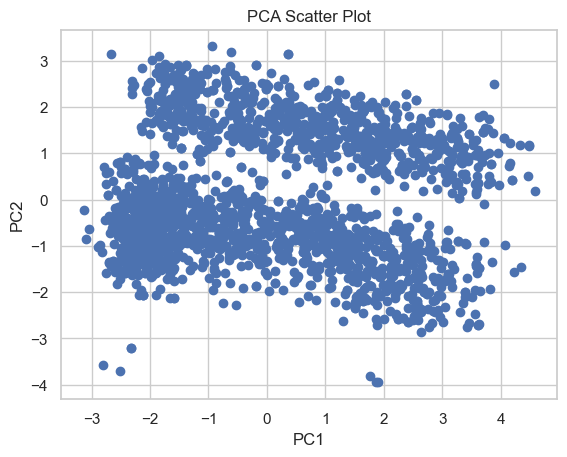

In [136]:
# visualize scatter plot
plt.scatter(df_pca['PC1'],df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

## 5.2 Elbow Method

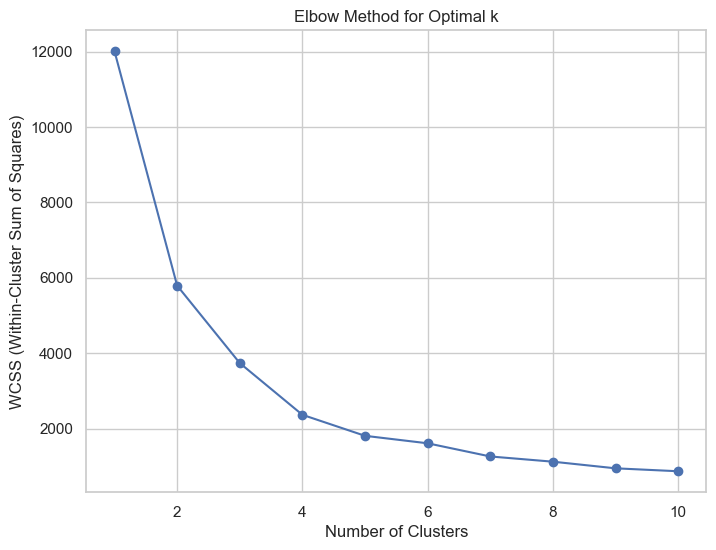

In [138]:
# Define the range of cluster numbers to test
k_range = range(1, 11)  # Trying from 1 to 10 clusters

# Initialize a list to store the inertia values (WCSS)
wcss = []

# Loop to calculate inertia for each cluster number
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_pca)  # data_pca is the dataset used for clustering
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## 5.2 Fit K-Means

In [142]:
# Determine the number of clusters based on the elbow method result
optimal_k = 4

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Train the model on the standardized data
kmeans.fit(data_pca)

# Add cluster labels to the DataFrame
labels = kmeans.fit_predict(data_pca)
df_pca['Cluster'] = kmeans.labels_
df_model['Cluster'] = kmeans.labels_

## 5.2 Silhouette Score per Cluster

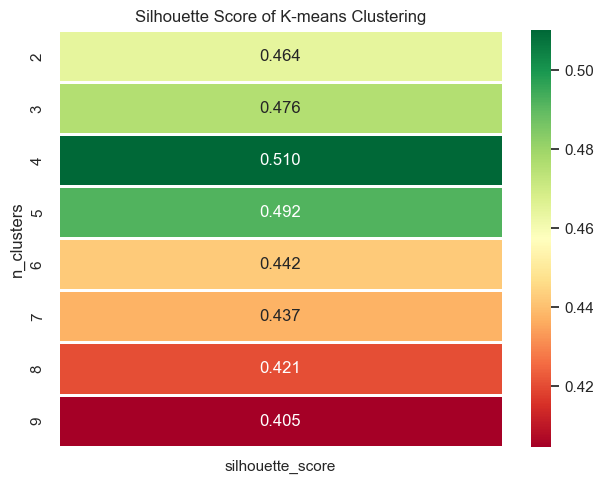

In [140]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, init='k-means++',random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()
    
# print chart
visualize_silhouette_layer(data_pca)

# 6.  Customer Personality Analysis for Marketing Retargeting, Cluster Interpretation, and Business Recommendation

## 6.1 Summary Statistics per Cluster

In [154]:
# Calculate summary statistics per cluster
summary_stats = df_model.groupby('Cluster')[['Conversion_Rate','Total_Spending','Total_Transaction','Age','Income']].describe()

summary_stats

Conversion_Rate                                                        \
                  count      mean       std  min    25%    50%      75%   max   
Cluster                                                                         
0                 900.0  1.490489  0.886897  0.0  0.860  1.250   2.0000   5.5   
1                 409.0  8.161247  5.573218  0.0  4.200  6.250  10.0000  28.0   
2                 388.0  2.051134  1.224951  0.0  1.135  1.845   2.6325   8.5   
3                 543.0  8.047790  5.654159  0.0  4.185  6.000  10.0000  43.0   

        Total_Spending                                                   \
                 count          mean            std       min       25%   
Cluster                                                                   
0                900.0  1.469778e+05  169992.604549    5000.0   41000.0   
1                409.0  1.173892e+06  428717.870992  237000.0  868000.0   
2                388.0  2.188608e+05  200718.402796    8000.0   53750.0   
3                543.0  1.214858e+06  459731.351203   62000.0  853500.0   

                                         Total_Transaction             \
               50%        75%        max             count       mean   
Cluster                                                                 
0          72000.0   192250.0  1679000.0             900.0   9.230000   
1        1106000.0  1477000.0  2440000.0             409.0  21.682152   
2         153500.0   337000.0  1103000.0             388.0  11.193299   
3        1169000.0  1536000.0  2525000.0             543.0  21.681400   

                                                   Age                       \
              std   min   25%   50%   75%   max  count       mean       std   
Cluster                                                                       
0        4.836296   0.0   6.0   8.0  12.0  26.0  900.0  47.792222  6.887960   
1        4.618452  10.0  18.0  22.0  25.0  39.0  409.0  68.772616  6.232004   
2        5.488655   0.0   7.0  10.0  16.0  29.0  388.0  67.927835  6.701456   
3        4.808104  10.0  18.0  21.0  25.0  44.0  543.0  48.136280  7.563009   

                                       Income                              \
          min   25%   50%   75%    max  count          mean           std   
Cluster                                                                     
0        28.0  43.0  49.0  53.0   59.0  900.0  3.570026e+07  1.453748e+07   
1        54.0  64.0  68.0  73.0  125.0  409.0  7.071471e+07  1.098595e+07   
2        55.0  64.0  67.5  72.0  131.0  388.0  4.310643e+07  1.380508e+07   
3        29.0  43.0  49.0  54.0   59.0  543.0  7.225639e+07  2.897095e+07   

                                                                      
                min         25%         50%         75%          max  
Cluster                                                               
0         1730000.0  25963500.0  35414500.0  43861500.0  162397000.0  
1        45938000.0  62845000.0  70638000.0  78939000.0  113734000.0  
2         4023000.0  34532750.0  45171500.0  51381500.0  156924000.0  
3         2447000.0  63209000.0  70643000.0  79160000.0  666666000.0

## 6.2 Cluster Mapping Based on Total Spending

In [146]:
# Mapping for Cluster Column based on spending
spending_mapping = {
    0 : 'Very Low Spender' ,
    1 : 'Mid Spender',
    2 : 'Low Spender',
    3 : 'High Spender'
}

# Apply mapping and create new column named 'Spending_Mapping'
df_model['Spending_Mapping'] = df_model['Cluster'].map(spending_mapping)

<Axes: xlabel='Spending_Mapping', ylabel='count'>

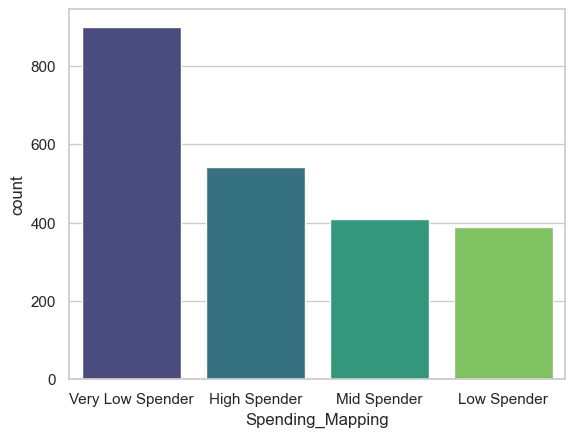

In [148]:
sns.countplot(data=df_model, x='Spending_Mapping', palette='viridis', order=df_model['Spending_Mapping'].value_counts().index)

Customers are predominantly categorized as **'Very Low Spenders'**, which increases the likelihood of churn among these customers.

## 6.3 Total Conversion Rate Per Cluster

Text(0.5, 1.0, 'Total Conversion Rate per Cluster')

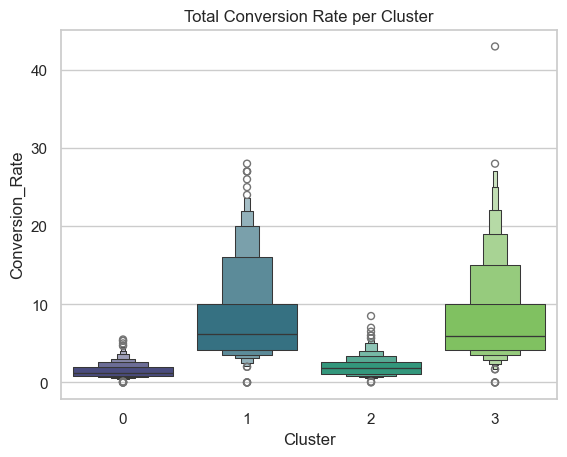

In [150]:
sns.boxenplot(x=df_model['Cluster'], y=df_model['Conversion_Rate'],palette='viridis')
plt.title('Total Conversion Rate per Cluster')

## 6.4 Total Spending Per Cluster

Text(0.5, 1.0, 'Total Spending per Cluster')

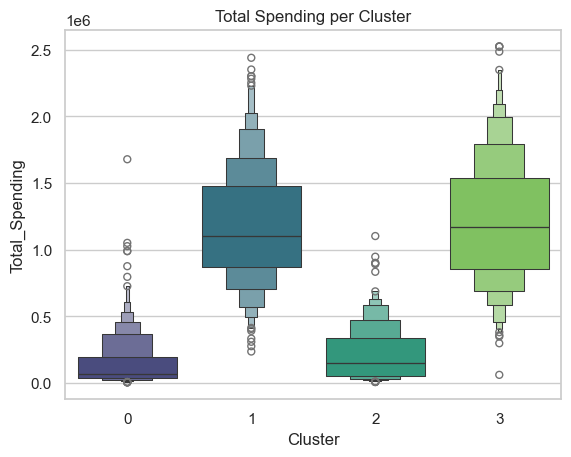

In [207]:
sns.boxenplot(x=df_model['Cluster'], y=df_model['Total_Spending'],palette='viridis')
plt.title('Total Spending per Cluster')

## 6.5 Total Transaction  Per Cluster

Text(0.5, 1.0, 'Total Transaction per Cluster')

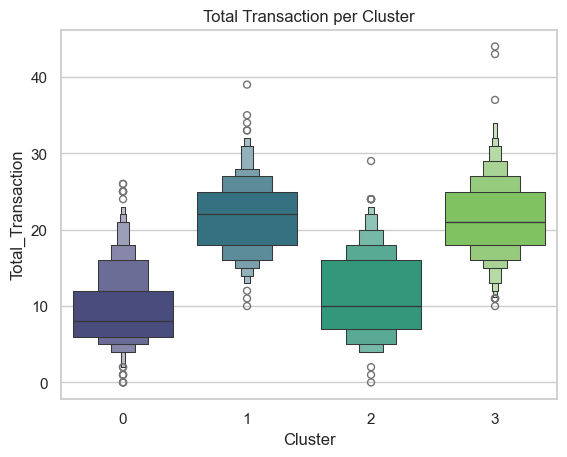

In [209]:
sns.boxenplot(x=df_model['Cluster'], y=df_model['Total_Transaction'],palette='viridis')
plt.title('Total Transaction per Cluster')

## 6.6 Total Age Per Cluster

Text(0.5, 1.0, 'Total Age per Cluster')

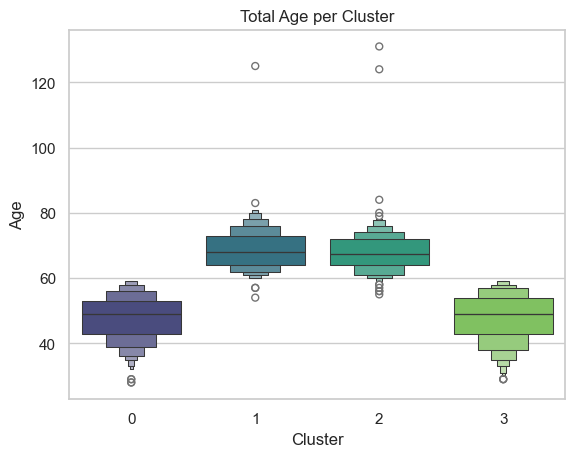

In [211]:
sns.boxenplot(x=df_model['Cluster'], y=df_model['Age'],palette='viridis')
plt.title('Total Age per Cluster')

## 6.7 Total Income Per Cluster

Text(0.5, 1.0, 'Total Income per Cluster')

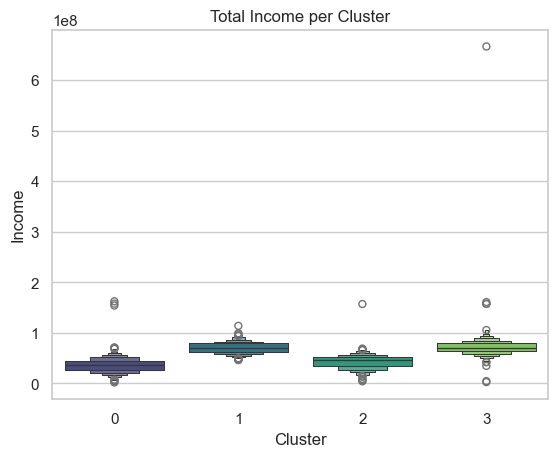

In [213]:
sns.boxenplot(x=df_model['Cluster'], y=df_model['Income'],palette='viridis')
plt.title('Total Income per Cluster')

## 6.8 Cluster Interpretation

1. **Cluster 0**: Dominated by customers with low conversion rates, total transactions, and total spending. Their ages range from 40 to 60, with an average income of 35.7 million.  
2. **Cluster 1**: Dominated by customers with high conversion rates, total transactions, and total spending. Their ages range from 64 to 73, with an average income of 70 million.  
3. **Cluster 2**: Dominated by customers with moderately low conversion rates, total transactions, and total spending, though slightly higher than Cluster 0. Their ages range from 64 to 72, with an average income of 47 million.  
4. **Cluster 3**: Dominated by customers with high conversion rates, total transactions, and total spending, surpassing those in Cluster 1. Their ages range from 43 to 54, with an average income of 72 million.

## 6.9 Business Recommendation

**Cluster 0: Low Conversion, Low Spending, Low Transactions**  
1. **Targeted Promotions for Engagement**: Offer personalized promotions, such as discounts or free trials, to incentivize engagement and increase spending.  
2. **Customer Education Campaigns**: Provide information about products/services that align with their income level to drive interest and awareness.  
3. **Loyalty Programs**: Introduce simple loyalty rewards to encourage repeated transactions.  

---

**Cluster 1: High Conversion, High Spending, High Transactions**  
1. **Exclusive Membership Benefits**: Offer exclusive perks (e.g., early access to sales, VIP customer service) to retain this high-value segment.  
2. **Upselling and Cross-Selling**: Suggest complementary products or premium services to maximize revenue from these customers.  
3. **Retention Campaigns**: Conduct satisfaction surveys and personalized follow-ups to maintain their loyalty.  

---

**Cluster 2: Moderate Conversion, Moderate Spending, Moderate Transactions**  
1. **Incentivize Engagement**: Use tiered loyalty programs that reward increased spending and engagement to encourage progression toward Cluster 1.  
2. **Mid-Range Product Bundling**: Create bundles or packages that fit their spending behavior to encourage larger transactions.  
3. **Customer Feedback**: Collect feedback to identify barriers preventing them from becoming higher spenders.  

---

**Cluster 3: High Conversion, High Spending, High Transactions (Higher Than Cluster 1)**  
1. **Premium Offerings**: Launch exclusive premium product lines or high-end services targeting this affluent and engaged group.  
2. **Ambassador Program**: Encourage these customers to act as brand ambassadors through referral bonuses or influencer collaborations.  
3. **Data-Driven Personalization**: Leverage their high engagement to offer highly personalized recommendations or tailored marketing campaigns.

<!-- Cluster Interpretation Based on Total Spending:

1. **Cluster 0 (Purple)**:
   - **Characteristics**: Users with low total spending and low conversion rate.
   - **Recommendations**: 
      - Enhance engagement with tailored offers or loyalty programs to encourage higher spending and conversions.
      - Further analyze this segment to understand their behavior and refine marketing strategies to appeal more directly to their needs.

2. **Cluster 1 (Yellow)**:
   - **Characteristics**: Users with moderate to high total spending but varying conversion rates.
   - **Recommendations**: 
      - Focus on retention strategies since they have significant spending potential. Offer exclusive packages or premium discounts to keep their spending consistent.
      - Consider personalized marketing to maintain their interest and encourage them to convert more often.

3. **Cluster 2 (Green)**:
   - **Characteristics**: Users with relatively high spending and conversion rates.
   - **Recommendations**: 
      - Retain current strategies for this cluster and consider offering exclusive rewards or loyalty programs as a form of appreciation.
      - Use this cluster as a benchmark to identify effective engagement strategies that can be applied to lower-converting clusters.

4. **Cluster 3 (Blue)**:
   - **Characteristics**: Users with very high spending and high conversion rates, representing top-performing customers.
   - **Recommendations**: 
      - Maintain strong retention efforts, potentially by offering personalized experiences, such as early access to new products or exclusive events.
      - Analyze the attributes of these high-value customers to replicate successful strategies with other clusters. -->